<img style="float: left;;" src='../Imagenes/iteso.jpg' width="50" height="100"/></a>

# <center> <font color= #000047> Módulo III: Aprendizaje supervizado: Regresión Lineal 

## Introducción

El Aprendizaje Supervizado se podría definir como un tipo de aprendizaje en IA en el que un algoritmo es entrenado con variables que incluyen los valores que queremos predecir; a estos valores conocidos se les llama `“etiquetas”` y se usan también para la evaluación del modelo. El aprendizaje supervisado se puede subdividir en dos tipos: 

- Clasificación

- Regresión.

### Clasificación

En cuanto a clasificación, el objetivo es predecir las etiquetas de clase categóricas de nuevos registros, con base en observaciones pasadas. Dependiendo de la etiqueta, se puede decir que la clasificación es binaria o multiclase. 

### Regresión

Respecto a regresión, se trata del proceso estadístico predictivo en el que el modelo intenta predecir un valor continuo (como ventas, precio, calificaciones) mediante la relación entre variables dependientes e independientes. Es decir, se encuentra una ecuación en la que se sustituyen los valores de las variables y como resultado se obtiene el valor a predecir 

### Algunos algortimos de Aprendizaje Supervizado

- **Regresión lineal:** Se trata de una regresión en la que al graficar la ecuación se forma una línea recta. Para obtener dicha ecuación, se usa el método de los cuadrados mínimos.


- **Regresión logística:** Es una regresión usada principalmente en problemas de clasificación binaria. A pesar de la aparente incongruencia, se trata de una regresión porque el resultado de la ecuación es la probabilidad de que pertenezca a una clase, que dependiendo del umbral que se utilice, se clasifica como positivo o negativo.


- **Support Vector Machine (SVM):** Típicamente se usa para problemas de clasificación, pero también se puede usar para regresión. En este algoritmo se construye un hiperplano que separa las clases de datos lo más posible.


- **Árboles de decisión:** Algoritmo de clasificación similar a un diagrama de flujo, en el que se evalúan valores en cada nodo para llegar a una clasificación al final.


- **Random Forest:** Este algoritmo consiste en combinar una gran cantidad de árboles de decisión independientes entre sí para reducir la varianza. Debido al conjunto de árboles, se le dio el nombre de “bosque”.



## Regresión Lineal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Data/ex1data1.txt', names=['population', 'profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


El objetivo es estimar el modelo:

$$ \hat{y} = \beta_1 x + \beta_0$$

donde $\beta_1$ es la pendiente y $\beta_0$ es la distancia de la intersección con el eje y.

Podemos estima mediante una ecuación matricial:

$$y=X\beta$$

$$X=[x;1]$$
$$\beta=[\beta_1 \beta_0]$$


In [3]:
#Identificar mis entrasdas (X) y mis salidas (y)
X_df = data[['population']]
y_df = data[['profit']]
m = len(y_df)

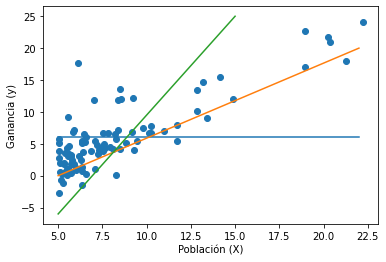

In [4]:
plt.figure(figsize=(6,4))
plt.scatter(X_df,y_df)
plt.plot([5,22],[6,6],'-')
plt.plot([5,22],[0,20],'-')
plt.plot([5,15],[-6,25],'-')

plt.xlabel('Población (X)')
plt.ylabel('Ganancia (y)')
plt.show()

In [5]:
# X = [1, X_df.values]
# beta = [beta0, beta1]
# y_hat = X*beta

# Implementar la función de costo 

Formalmente definimos la funcion de costo como el error cuadrático medio, qué deberemos minimizar.

$$ J(\beta) = \frac{1}{2m}\sum_{i=1}^m (\hat{y}(x_i) - y_i)^2$$

$\beta = [\beta_0, \beta_1]$

si derivamos parcialmente e igualamos a cero $\frac{\partial J(\beta)}{\partial \beta}=0$



tendríamos que las ecuaciones del algoritmo de gradiente descendente son:

$$ \beta_0 = \beta_0 - \alpha \frac{1}{m} \sum_{i=1}^m (\hat{y}(x_i) - y_i)$$

$$ \beta_1 = \beta_1 - \alpha \frac{1}{m} \sum_{i=1}^m (\hat{y}(x_i) - y_i)x_i$$



In [6]:
def cost_function(X,y, beta):
    m = len(y)
    #Calcular la función de costo que es el error cuadrático medio (MSE)
    J =np.sum((X.dot(beta) - y)**2)/(2*m)
    return J

$$X=[1;x]$$
$$\beta=[\beta_0;\beta_1]$$
$$\hat{y}=X^T\beta = \beta_1 x +\beta_0$$


In [7]:
# X = [ X_df.values, 1]
X_df['intercept'] =1
X_df

,population,intercept
0,6.1101,1
1,5.5277,1
2,8.5186,1
3,7.0032,1
4,5.8598,1
...,...,...
92,5.8707,1
93,5.3054,1
94,8.2934,1
95,13.3940,1


In [8]:
y_df

,profit
0,17.59200
1,9.13020
2,13.66200
3,11.85400
4,6.82330
...,...
92,7.20290
93,1.98690
94,0.14454
95,9.05510


In [9]:
X = X_df.values
y = y_df.values.flatten()


In [10]:
#Inicializar los valores de beta =[beta_0,beta_1] y_hata = 0*x + 0
beta = np.array([0,0])


In [11]:
cost_function(X,y,beta)

32.072733877455676

In [12]:
# Algoritmo de gradiente descendente
def gradient_descent(X,y,beta, alpha,iterations):
    cost_history = []
    m = len(y)
    
    for it in range(iterations):
        #Modelo lineal y_hat(xi) = beta_0 + beta_1*x = X*Beta
        y_hat = X.dot(beta)
        loss = (y_hat - y)
        gradiente = X.T.dot(loss)/m
        
        #Actualizar los valores de beta (algoritmo de gradiente descendente)
        beta = beta - alpha*gradiente
        
        #Obtener la función de costo (error cuadrático medio)
        cost = cost_function(X,y,beta)
        cost_history.append(cost) 
    
    return beta, cost_history
        

In [13]:
# Inicializamos los parámetros
it = 2500
alpha = 0.01  #tasa de entrenamiento (cómo se va descendiendo por el gradiente)
beta = np.array([0,0])

#Llamar el algoritmo de gradiente descendente
beta, cost_h = gradient_descent(X,y,beta, alpha, it)

In [14]:
beta

array([ 1.18864349, -3.85208068])

$$\hat{y} = 1.1886x - 3.852$$

In [15]:
cost_h

[6.737190464870009,
 5.9315935686049555,
 5.901154707081388,
 5.895228586444221,
 5.8900949431173295,
 5.885004158443647,
 5.879932480491418,
 5.874879094762575,
 5.869843911806385,
 5.8648268653129305,
 5.859827889932181,
 5.85484692057229,
 5.849883892376587,
 5.844938740722034,
 5.840011401218361,
 5.835101809707226,
 5.830209902261388,
 5.825335615183863,
 5.820478885007099,
 5.815639648492154,
 5.810817842627869,
 5.806013404630044,
 5.801226271940628,
 5.7964563822269,
 5.7917036733806535,
 5.7869680835173956,
 5.782249550975539,
 5.777548014315596,
 5.772863412319381,
 5.768195683989212,
 5.76354476854712,
 5.758910605434047,
 5.754293134309077,
 5.749692295048629,
 5.745108027745684,
 5.740540272709012,
 5.735988970462381,
 5.731454061743792,
 5.726935487504702,
 5.722433188909257,
 5.717947107333529,
 5.713477184364749,
 5.709023361800549,
 5.704585581648199,
 5.700163786123857,
 5.695757917651815,
 5.691367918863751,
 5.68699373259798,
 5.682635301898707,
 5.678292570015292,


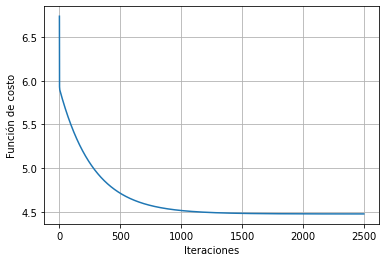

In [16]:
plt.figure(figsize=(6,4))
plt.plot(cost_h)
plt.xlabel('Iteraciones')
plt.ylabel('Función de costo')
plt.grid()

In [17]:
beta

array([ 1.18864349, -3.85208068])

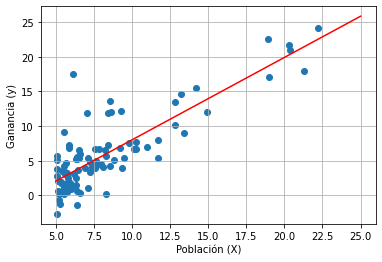

In [18]:
x_num = np.linspace(5,25,100)
y_hat_num = beta[1] + beta[0]*x_num

plt.figure(figsize=(6,4))
plt.scatter(data['population'],data['profit'])
plt.plot(x_num,y_hat_num, '-r')
plt.xlabel('Población (X)')
plt.ylabel('Ganancia (y)')
plt.grid()
plt.show()

In [19]:
#Predecir un nuevo valor
x_new = 17.5
y_predict = np.array([x_new,1]).dot(beta)  # X*Beta = b0 + b1*x
y_predict

16.949180313081197

In [20]:
X_new = np.array([[17.5,1],
                 [21, 1],
                 [22.5,1]])
y_predict = X_new.dot(beta)
y_predict

array([16.94918031, 21.10943251, 22.89239774])

### Realizar el mismo ejemplo utilizando librerías de python (sklearn)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [23]:
# Identificar los conjuntos de entrada (X) y de salida (y)
X = data['population'].values.reshape(-1,1)
y = data['profit'].values.reshape(-1,1)

In [24]:
#Instanciar un objeto de la clase LinearRegression
modelo_lineal = LinearRegression()
# Entrenal el modelo lineal
modelo_lineal.fit(X,y)


LinearRegression()

In [25]:
# Los atributos de modelo_lineal contienen los valores de beta
modelo_lineal.coef_ # beta1

array([[1.19303364]])

In [26]:
modelo_lineal.intercept_ #beta0

array([-3.89578088])

Modelo lineal obtenido con la librería sklearn
$$\hat{y} = 1.193x - 3.895$$

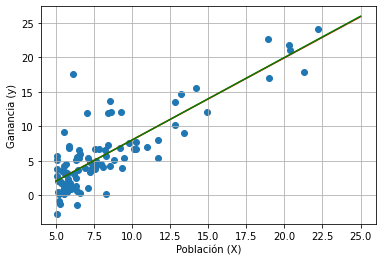

In [27]:
x_num = np.linspace(5,25,100)
y_hat_num = beta[1] + beta[0]*x_num

y_hat_num_sklearn = modelo_lineal.coef_*x_num + modelo_lineal.intercept_

plt.figure(figsize=(6,4))
plt.scatter(data['population'],data['profit'])
plt.plot(x_num,y_hat_num, '-r')
plt.plot(x_num,y_hat_num_sklearn.flatten(), '-g')
plt.xlabel('Población (X)')
plt.ylabel('Ganancia (y)')
plt.grid()
plt.show()

In [28]:
X_new = np.array([[17.5,21,25.5]]).T

In [29]:
X_new


array([[17.5],
       [21. ],
       [25.5]])

In [30]:
modelo_lineal.predict(X_new)  # y_hat = X*beta

array([[16.9823079 ],
       [21.15792565],
       [26.52657705]])

### Regresión Poilinomial

In [31]:
datos = pd.read_csv('../Data/Position_Salaries.csv')

In [32]:
datos.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [33]:
X = datos['Level'].values.reshape(-1,1)
y = datos['Salary'].values.reshape(-1,1)

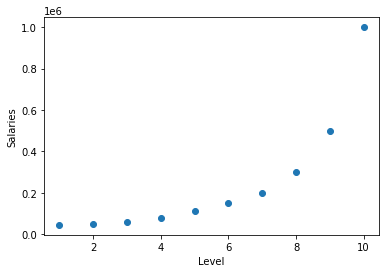

In [34]:
plt.figure(figsize=(6,4))
plt.scatter(X,y)
plt.xlabel('Level')
plt.ylabel('Salaries')
plt.show()

In [35]:
#Aplicar un modelo lineal al conjunto de datos
model = LinearRegression()
#Entrenar al modelo
model.fit(X,y)
#Predicir los valores de X
y_pred = model.predict(X)

In [36]:
#Mostrar los valores de beta
model.intercept_, model.coef_

(array([-195333.33333333]), array([[80878.78787879]]))

$$ \hat{y}= -198333.33 + 80878.78 x$$

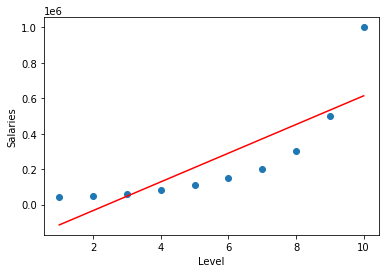

In [37]:
plt.figure(figsize=(6,4))
plt.scatter(X,y)
plt.plot(X,y_pred, 'r')
plt.xlabel('Level')
plt.ylabel('Salaries')
plt.show()

In [38]:
# Métricas para evaluar al modelo
# 1.- Error cuadrático medio
# 2.- R2 score (0-1)
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_pred,y))
r2score = r2_score(y_pred,y)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2score}')

RMSE: 163388.73519272613
R2 Score: 0.5053238120653418


#### Aplicando un modelo polinomial de grado 2

Modelo Lineal:

$$ \hat{y} = \beta_0 + \beta_1 x $$

Modelo polinomial de grado 2

$$ \hat{y} = \beta_0 + \beta_1 x + \beta_2 x^2 = \beta * X$$

$X= [1,xi,xi^2], beta = [beta_0, beta_1, beta_2]$

In [39]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
poly = PolynomialFeatures(degree=3, include_bias = True)
X_poly = poly.fit_transform(X)

In [42]:
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [43]:
#Aplicar el modelo lienal con LinearRegression()
model_poly = LinearRegression()
model_poly.fit(X_poly, y)
y_pred_poly = model_poly.predict(X_poly)

In [44]:
model_poly.intercept_, model_poly.coef_

(array([-121333.33333331]),
 array([[     0.        , 180664.33566432, -48548.95104895,
           4120.04662005]]))

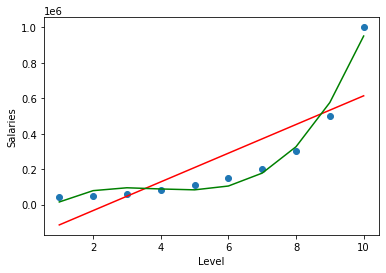

In [45]:
plt.figure(figsize=(6,4))
plt.scatter(X,y)
plt.plot(X,y_pred, 'r')
plt.plot(X,y_pred_poly, 'g')
plt.xlabel('Level')
plt.ylabel('Salaries')
plt.show()

In [46]:
#Evaluar el modelo polinomial
rmse = np.sqrt(mean_squared_error(y_pred_poly,y))
r2score = r2_score(y_pred_poly,y)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2score}')

RMSE: 38931.50401232928
R2 Score: 0.9808499387901431


## Regresion Lineal Multiple

In [47]:
data = pd.read_csv('../Data/50_Startups.csv')
data.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [48]:
data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

$$ \hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3  + ... + \beta_n x_n$$

In [49]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

#### Preprocesamiento de datos para encontrar el modelo de daots

In [52]:
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [57]:
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(),[3])], remainder='passthrough')
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(), [3])])

In [61]:
X = ct.fit_transform(X.values)
y = y.values

In [66]:
#salidas
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [63]:
#Matriz de entradas transformado
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [67]:
#Contruir el modelo de reg multiple
modelo_reg_mult = LinearRegression()
modelo_reg_mult.fit(X, y)
y_pred_reg_mult = modelo_reg_mult.predict(X)

In [68]:
#Evaluamos el modelo obtenido
r2_score(y, y_pred_reg_mult)

0.9507524843355148

In [69]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

Text(0.5, 0, 'profit')

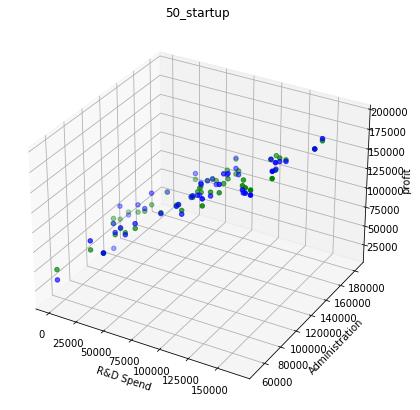

In [74]:
#Visualizar la distribución de los datos para 3 variables
fig=plt.figure(figsize=(10,7))
ax=plt.axes(projection='3d')

ax.scatter3D(data['R&D Spend'].values, data['Administration'].values, y, c='b')
ax.scatter3D(data['R&D Spend'].values, data['Administration'].values, y_pred_reg_mult, c='g')
plt.title('50_startup')
ax.set_xlabel('R&D Spend')
ax.set_ylabel('Administration')
ax.set_zlabel('profit')

Text(0.5, 0, 'profit')

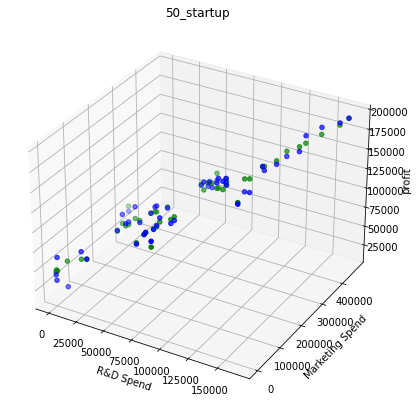

In [75]:
#Visualizar la distribución de los datos para 3 variables
fig=plt.figure(figsize=(10,7))
ax=plt.axes(projection='3d')

ax.scatter3D(data['R&D Spend'].values, data['Marketing Spend'].values, y, c='b')
ax.scatter3D(data['R&D Spend'].values, data['Marketing Spend'].values, y_pred_reg_mult, c='g')
plt.title('50_startup')
ax.set_xlabel('R&D Spend')
ax.set_ylabel('Marketing Spend')
ax.set_zlabel('profit')

Text(0.5, 0, 'profit')

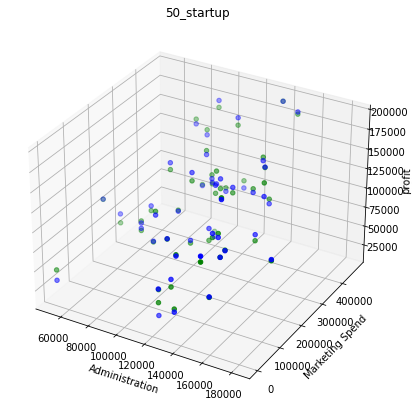

In [76]:
#Visualizar la distribución de los datos para 3 variables
fig=plt.figure(figsize=(10,7))
ax=plt.axes(projection='3d')

ax.scatter3D(data['Administration'].values, data['Marketing Spend'].values, y, c='b')
ax.scatter3D(data['Administration'].values, data['Marketing Spend'].values, y_pred_reg_mult, c='g')
plt.title('50_startup')
ax.set_xlabel('Administration')
ax.set_ylabel('Marketing Spend')
ax.set_zlabel('profit')

In [79]:
X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

Text(0.5, 0, 'profit')

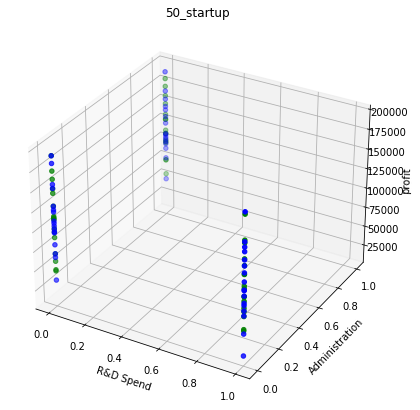

In [78]:
#Visualizar la distribución de los datos para 3 variables
fig=plt.figure(figsize=(10,7))
ax=plt.axes(projection='3d')

ax.scatter3D(X[:,0], X[:,1], y, c='b')
ax.scatter3D(X[:,0], X[:,1], y_pred_reg_mult, c='g')
plt.title('50_startup')
ax.set_xlabel('R&D Spend')
ax.set_ylabel('Administration')
ax.set_zlabel('profit')

### predecir el profit de una nueva start_up


Predicción con los siguientes valores:

- R&D spend = 9386.5
- Administration = 101158.3
- Marketing = 127716.8
- La start up se encuentra en el estado de california

¿Cuánto profit se puede obtener apartir de estos datos según el modelo creado?

In [80]:
X[0,:]

array([0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1], dtype=object)

In [81]:
X_new = np.array([[1, 0, 0, 9386.5, 101158.3, 127716.8]])

In [83]:
#Encontrar la pred atravez del modelo
y_new = modelo_reg_mult.predict(X_new)
y_new

array([58405.15024342])